# Coroutine
A function which can pause and resume its execution

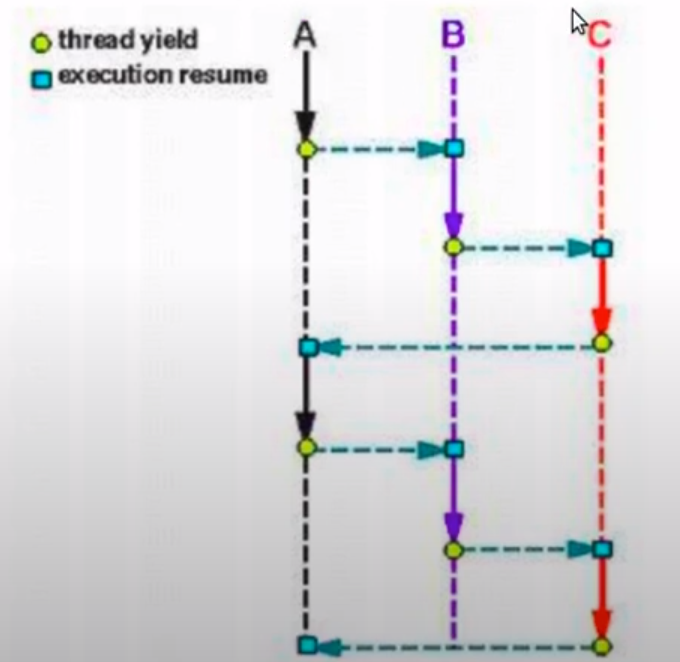

So, we have 3 co-routines (or function in general term)
- You start the execution of A, then after sometime you pause the execution of A and start B, then again after some stage you stop B and start C.
- Again, after sometime you pause C and start A again and repeats
This is how co-routines work.

### How to define a coroutine ?

```python
async def main():
    ...
    ...
```
To make a co-routine, you actually need to have a function that you convert into a co-routines.
You can do that using **async/await**

In [2]:
# a normal function
def main():
    print("HELLO")

In [3]:
main()

HELLO


In [4]:
# convert that function into a coroutine
async def main():
    print("HELLO (coroutine)")

In [5]:
main()

<coroutine object main at 0x7ff8195b6c80>

We convert a function into coroutine by using async syntax and when you call a co-routine you are not actually executing the function. There are different ways to actually trigger a coroutine.

### How to pause execution of coroutine ?
```python
async def main():
    await awaitable_object
    ...
    ...
```
> Awaitable objects are: **coroutines, Tasks & Futures**

> **Tasks** are used to schedule coroutines concurrently. When a coroutine is wrapped into a Task with functions like `asyncio.create_task()` the coroutine is automatically scheduled to run soon.

> A **Future** is a special low-level awaitable object that repeats and eventual result of an asynchronous operation.

-----

# Asyncio
> To write **concurrent, asynchronous,** & **cooperative** code in a sequential style.

- Concurrency is basically dealing with multiple things at once. (multipe tasks are running at the same time and we are overlapping their lifecycyle)
  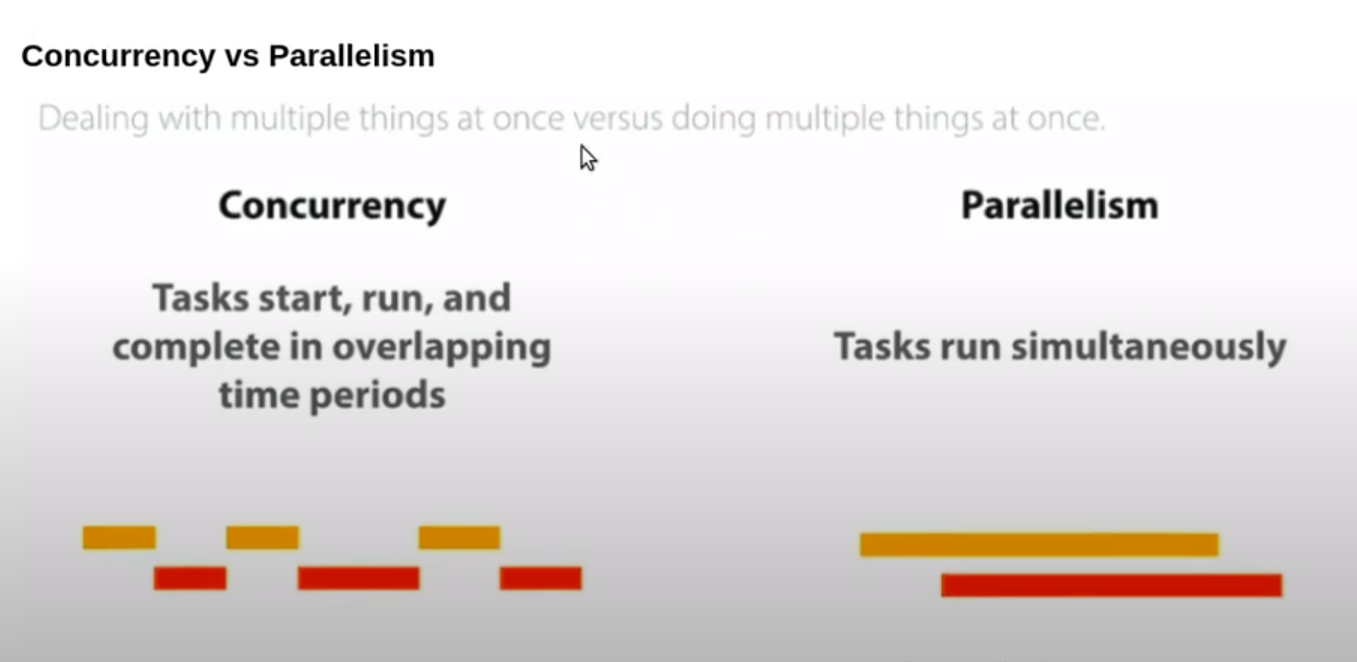
- It helps us to write asynchronous program, where you do not wait for result or whenever it is available it is fine. (overall duration of the program becomes shorter)
  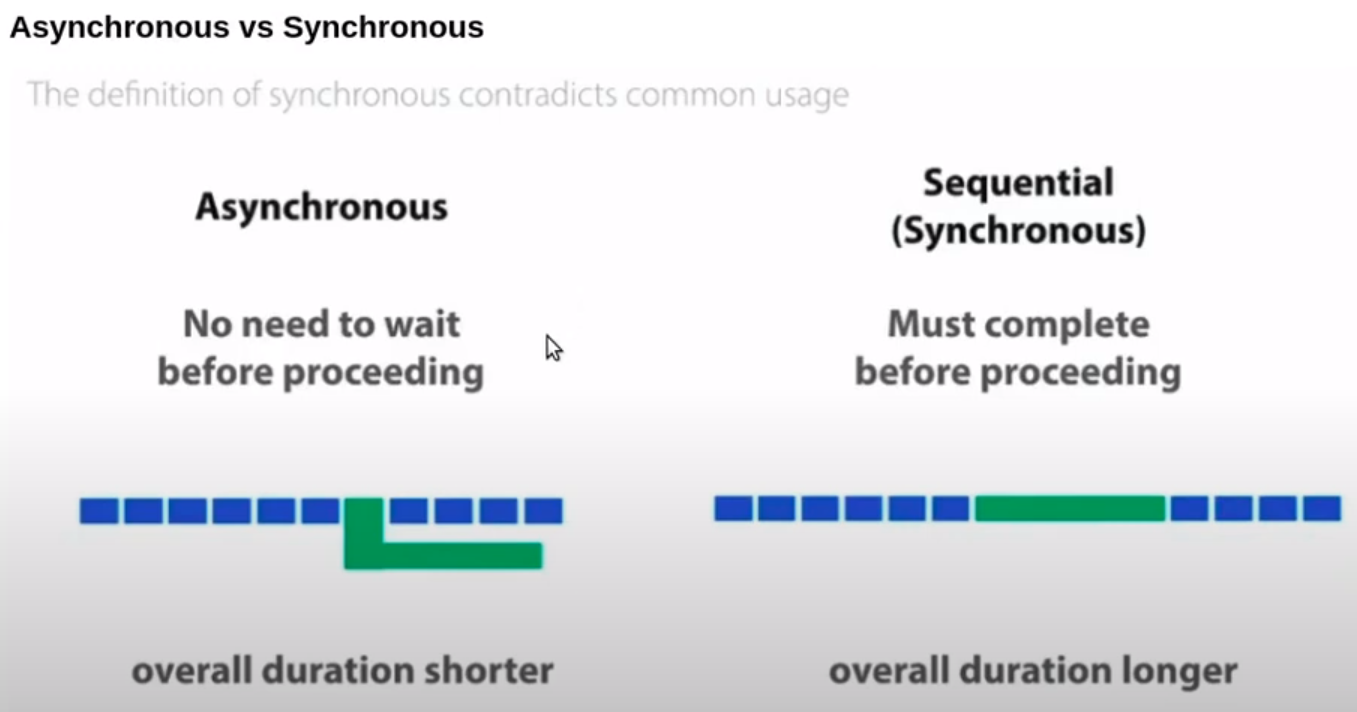
- Cooperative code
  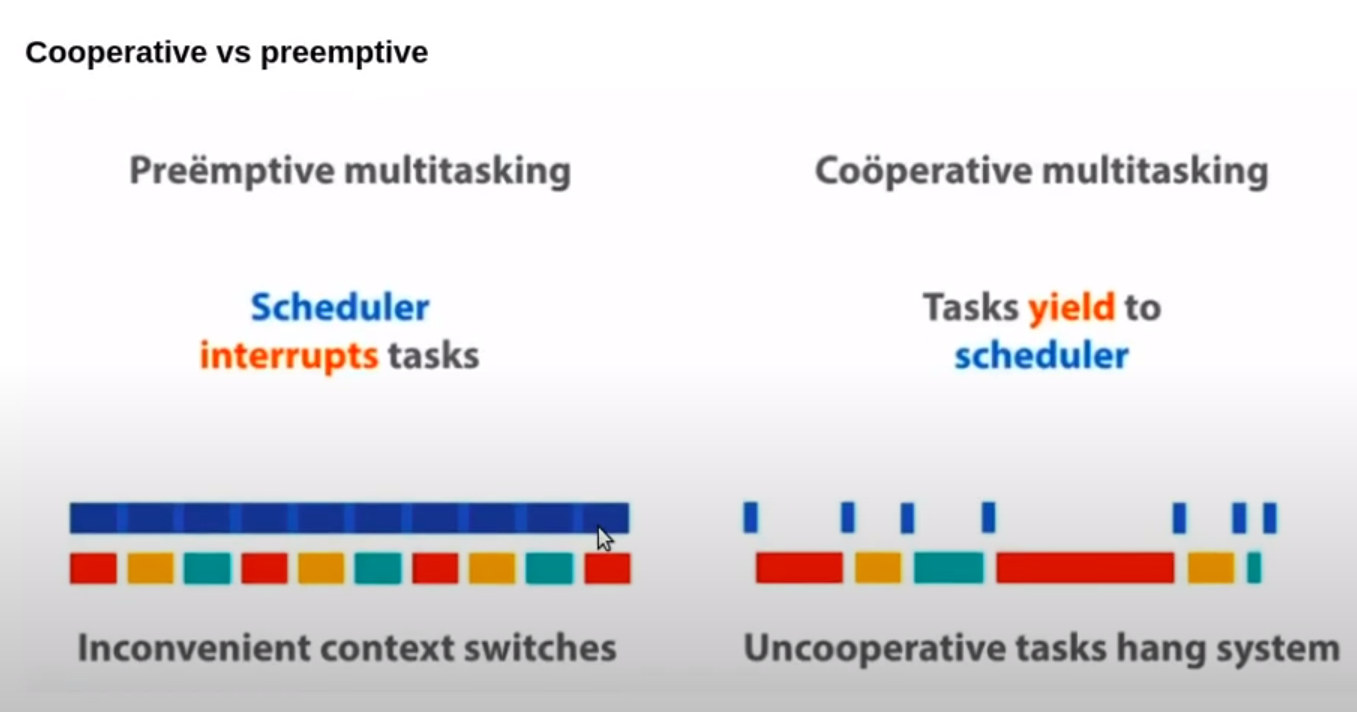
  
All these things together makes asyncio a great deal.
> NOTE: asyncio is used as a foundation for multiple python asynchronous frameworks that provide high-performance network and web-servers, database connection libraries, distributed task queues etc.

### How to execute coroutine ?

**USING EVENT LOOP**
> The **event loop** is a core of every asyncio application. It runs in a thread (typically the main thread) and executes all callbacks and tasks in its thread.
  ```python
  loop = asyncio.get_event_loop()
  loop.run_until_complete(my_coroutine())
  loop.close()
  ```
  **`a shortcut (since python 3.7)`**
  ```python
  asyncio.run(my_coroutine())
  ```

In [8]:
import asyncio

async def main():
    print("Hello world!")
    
# asyncio.run(main())

In [9]:
# writing a co-routine with awaitable object

async def main():
    print("HELLO")
    await asyncio.sleep(3)
    print("WORLD...")
    
# asyncio.run(main())

### How to execute coroutines concurrently ?

**Using asyncio.gather()**

It takes multiple coroutines and run them concorrently

```python
import asyncio

async def main():
    await asyncio.gather(
        coroutine_1(),
        coroutine_2(),
        coroutine_3(),
        coroutine_4(),
    )
    
asyncio.run(main())
```

In [12]:
# Example

import time

async def display_time():
    start_time = time.time()
    
    while True:
        dur = int(time.time() - start_time)
        
        if dur % 3 == 0:
            print(f"{dur} seconds have passed!")
            
        await asyncio.sleep(1)

async def print_nums():
    num = 1
    
    while True:
        print(num)
        num += 1
        await asyncio.sleep(0.5)
        
async def main():
    task1 = asyncio.create_task(display_time)
    task2 = asyncio.create_task(print_nums)
    
    await asyncio.gather(task1, task2)
    
# asyncio.run(main())